In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("/Users/mac/Desktop/mlbanking/notebook/cleaned_transactions.csv")
df_features = df.drop(columns=['TRANSACTION_ID', 'TX_FRAUD', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO'])


In [3]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_features)

In [4]:
your_features = standardized_features
your_labels = df['TX_FRAUD']

In [5]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(your_features, your_labels, test_size=0.2, random_state=42)


In [6]:
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy, f1, precision, recall

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

model_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model



# Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train, f1_train, precision_train, recall_train = evaluate_classification_model(y_train, y_train_pred)
    accuracy_test, f1_test, precision_test, recall_test = evaluate_classification_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))

    accuracy_list.append(accuracy_test)
    f1_list.append(f1_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)

    print('='*35)
    print('\n')    

Logistic Regression
Model performance for Training set
- Accuracy: 0.6169
- F1 Score: 0.5564
- Precision: 0.6605
- Recall: 0.4807
----------------------------------
Model performance for Test set
- Accuracy: 0.6161
- F1 Score: 0.5560
- Precision: 0.6600
- Recall: 0.4804


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.9919
- F1 Score: 0.9920
- Precision: 0.9841
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9879
- F1 Score: 0.9881
- Precision: 0.9764
- Recall: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9962
- F1 Score: 0.9962
- Precision: 0.9925
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test s

In [8]:
# Insert your code for Decision Tree GridSearchCV here
dt_clf = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)
print("Best hyperparameters for Decision Tree: ", grid_search.best_params_)

Best hyperparameters for Decision Tree:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [9]:
# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
y_pred_DTC = model.predict(X_test)
acc_DTC = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc_DTC)
print("Confusion Matrix:\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 0.9962474309777375
Confusion Matrix:
 [[345017   2611]
 [     0 348162]]


In [10]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_RFC = model.predict(X_test)
acc_RFC = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc_RFC)
print("Confusion Matrix:\n", cm_RFC)

Random Forest Classifier:
Accuracy: 0.9993101366791705
Confusion Matrix:
 [[347148    480]
 [     0 348162]]


Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

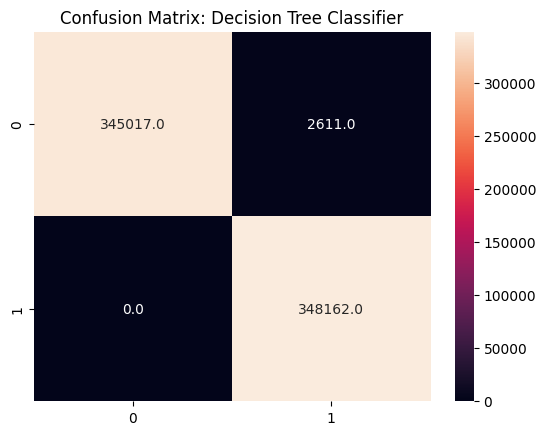

In [11]:
# Create heatmaps for confusion matrices
cm_sns_DTC = sns.heatmap(cm_DTC, annot=True, fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

Text(0.5, 1.0, 'Confusion Matrix: Random Forest Classifier')

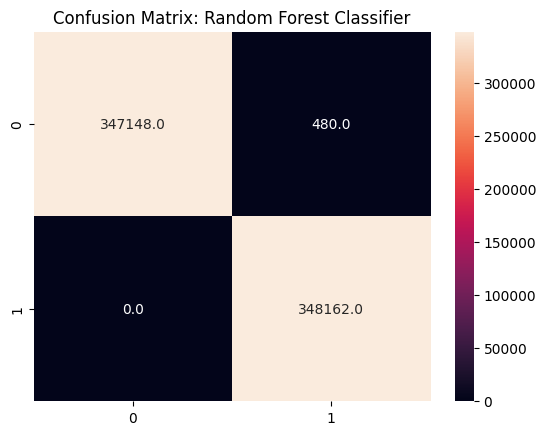

In [12]:
cm_sns_RFC = sns.heatmap(cm_RFC, annot=True, fmt='.1f')
cm_sns_RFC.set_title('Confusion Matrix: Random Forest Classifier')

In [13]:
# Calculate precision, recall, and F1-score
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.9925564396347495
Recall:  1.0
F1-Score:  0.996264316424274


In [14]:
precision_RFC = precision_score(y_test, y_pred_RFC)
recall_RFC = recall_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC)
print("Random Forest Classifier")
print("Precision: ", precision_RFC)
print("Recall: ", recall_RFC)
print("F1-Score: ", f1_RFC)

Random Forest Classifier
Precision:  0.9986232295592614
Recall:  1.0
F1-Score:  0.9993111405789864


In [16]:
# Create a DataFrame for visualization
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier']
metrics = ['Precision', 'Recall', 'F1-Score']

df_vis = pd.DataFrame({
    'Classifier': [classifiers[0]] * 3 + [classifiers[1]] * 3,
    'Metrics': metrics * 2,
    'Score': [precision_DTC, recall_DTC, f1_DTC, precision_RFC, recall_RFC, f1_RFC]
})

In [17]:
fig = px.bar(df_vis, x='Classifier', y='Score', color='Metrics', barmode='group',
             height=400, width=600, title="Classifier Performance Metrics")

fig.update_layout(xaxis=dict(categoryorder='category ascending'))
fig.update_traces(customdata=df_vis['Score'], texttemplate='%{customdata}', textposition='auto', textfont=dict(size=8))
fig.update_traces(text=df_vis['Score'], texttemplate='%{text}', textposition='outside', textfont=dict(size=8))
fig.update_traces(hovertemplate='%{x}<br>Score: %{y:.4f}<extra></extra>')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(text=df_vis['Score'].round(2).astype(str), texttemplate='%{text:.4f}', textposition='outside', textfont=dict(size=8))
fig.show()